# **Analisis base de datos empleo DANE**
### Paula Jaramillo 
### Samuel Balaguera
### Brayan Sua


En el presente trabajo pretendendemos analizar la base de datos de empleo que nos proporciona el DANE, con ella sacar conclusiones acerca de los datos, generando tablas y graficas para su mayor comprensión.

Lo primero que haremos es importar el modulo de pandas para poder tener la visualización de la tabla de datos.

In [ ]:
import pandas as pd

In [ ]:
Empleo_regiones = pd.read_excel ("/content/Empleo Regiones.xlsx",
                                skiprows= 10,
                                nrows= 95-11 )
Empleo_regiones

,Concepto,Región,2017-I,2017-II,2018-I,2018-II,2019-I,2019-II
0,% población en edad de trabajar,Total Nacional,80.083707,80.169563,80.276989,80.337312,80.421177,80.505482
1,TGP,Total Nacional,64.297709,64.480898,63.727078,64.230119,63.218591,63.331541
2,TO,Total Nacional,57.982500,58.727986,57.328496,58.245188,56.296386,56.963052
3,TD,Total Nacional,9.821826,8.921886,10.040606,9.317955,10.949634,10.055802
4,T.D. Abierto,Total Nacional,9.195806,8.316545,9.360534,8.686486,10.313000,9.409310
...,...,...,...,...,...,...,...,...
79,Ocupados,Bogotá,4083.373000,4165.877000,4093.746000,4214.035000,4136.974000,4235.628000
80,Desocupados,Bogotá,514.817000,454.028000,512.127000,461.682000,557.566000,466.585000
81,Abiertos,Bogotá,492.502000,440.181000,488.722000,446.161000,540.190000,453.733000
82,Ocultos,Bogotá,22.315000,13.847000,23.405000,15.520000,17.376000,12.852000


Para una mayor comprensión de los datos en la variables float utilizaremos solo 2 decimales.

In [ ]:
Empleo_regiones=Empleo_regiones.round(2)
Empleo_regiones

,Concepto,Región,2017-I,2017-II,2018-I,2018-II,2019-I,2019-II
0,% población en edad de trabajar,Total Nacional,80.08,80.17,80.28,80.34,80.42,80.51
1,TGP,Total Nacional,64.30,64.48,63.73,64.23,63.22,63.33
2,TO,Total Nacional,57.98,58.73,57.33,58.25,56.30,56.96
3,TD,Total Nacional,9.82,8.92,10.04,9.32,10.95,10.06
4,T.D. Abierto,Total Nacional,9.20,8.32,9.36,8.69,10.31,9.41
...,...,...,...,...,...,...,...,...
79,Ocupados,Bogotá,4083.37,4165.88,4093.75,4214.04,4136.97,4235.63
80,Desocupados,Bogotá,514.82,454.03,512.13,461.68,557.57,466.58
81,Abiertos,Bogotá,492.50,440.18,488.72,446.16,540.19,453.73
82,Ocultos,Bogotá,22.32,13.85,23.40,15.52,17.38,12.85


In [ ]:
Empleo_regiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Concepto  84 non-null     object 
 1   Región    84 non-null     object 
 2   2017-I    84 non-null     float64
 3   2017-II   84 non-null     float64
 4   2018-I    84 non-null     float64
 5   2018-II   84 non-null     float64
 6   2019-I    84 non-null     float64
 7   2019-II   84 non-null     float64
dtypes: float64(6), object(2)
memory usage: 5.4+ KB


En la información obtenida por nuestra base de datos, encontramos que 6 de nuestras columnas son de tipo float es decir decimales y 2 object

In [ ]:
Empleo_regiones.columns

Index(['Concepto', 'Región', '2017-I', '2017-II', '2018-I', '2018-II',
       '2019-I', '2019-II'],
      dtype='object')

Los indices de nuestras columnas empiezan por el concepto la cual presenta los temas de estudio como la TO, TD población total de cada región entre otras, el siguiente indice nos presenta la región, en este caso nos muestra de que región es cada dato, tiniendo las regiones del pacifico, caribe, central, oriental, Bogotá y el total del país.

Como tenemos 4 regiones, Bogotá y el total generaremos un indice multinivel el cual nos genere una comidad para la comparación de los datos por regiones

In [ ]:
Regiones_ordenadas = Empleo_regiones.set_index(["Región","Concepto"])

Regiones_ordenadas

2017-I  ...  2019-II
Región         Concepto                                   ...         
Total Nacional % población en edad de trabajar     80.08  ...    80.51
               TGP                                 64.30  ...    63.33
               TO                                  57.98  ...    56.96
               TD                                   9.82  ...    10.06
               T.D. Abierto                         9.20  ...     9.41
...                                                  ...  ...      ...
Bogotá         Ocupados                          4083.37  ...  4235.63
               Desocupados                        514.82  ...   466.58
               Abiertos                           492.50  ...   453.73
               Ocultos                             22.32  ...    12.85
               Inactivos                         1996.59  ...  2132.23

[84 rows x 6 columns]

Luego de hacer nuestro indice multinivel nos enfocamos en Bogotá y en los datos que tenemos para Bogotá y cada región.

In [ ]:
Regiones_ordenadas.loc["Bogotá"]

,2017-I,2017-II,2018-I,2018-II,2019-I,2019-II
Concepto,,,,,,
% población en edad de trabajar,82.04,82.12,82.21,82.29,82.37,82.45
TGP,69.72,69.55,68.84,69.38,69.17,68.80
TO,61.92,62.71,61.18,62.53,60.96,61.97
TD,11.20,9.83,11.12,9.87,11.88,9.92
T.D. Abierto,10.71,9.53,10.61,9.54,11.51,9.65
T.D. Oculto,0.49,0.30,0.51,0.33,0.37,0.27
Población total,8038.87,8089.07,8139.16,8189.16,8239.09,8288.95
Población en edad de trabajar,6594.78,6642.92,6690.90,6738.80,6786.64,6834.44
Población económicamente activa,4598.19,4619.90,4605.87,4675.72,4694.54,4702.21


Para hacer mas facil la comparación de los datos generamos una tabla para cada variable de estudio y para cada región, empezaremos con la TGP, omitiremos el total nacional para poder hacer una comparación de la regiones y Bogotá.

In [ ]:
lista_regiones_tgp =[("Bogotá" ,"TGP") , ("Región Pacifica" , "TGP"), ("Región Caribe" , "TGP"),
                 ("Región Central", "TGP"), ("Región Oriental", "TGP")]

regiones_tgp = Regiones_ordenadas.loc[lista_regiones_tgp]
regiones_tgp

,,2017-I,2017-II,2018-I,2018-II,2019-I,2019-II
Región,Concepto,,,,,,
Bogotá,TGP,69.72,69.55,68.84,69.38,69.17,68.80
Región Pacifica,TGP,65.53,64.47,64.35,63.94,62.86,64.31
Región Caribe,TGP,60.30,61.40,59.64,61.34,60.45,60.26
Región Central,TGP,63.11,63.08,62.42,63.06,61.84,61.98
Región Oriental,TGP,64.36,65.31,64.99,64.68,63.13,62.73


In [ ]:
regiones_tgp.mean(1)

Región           Concepto
Bogotá           TGP         69.243333
Región Pacifica  TGP         64.243333
Región Caribe    TGP         60.565000
Región Central   TGP         62.581667
Región Oriental  TGP         64.200000
dtype: float64

En primera instancia analizamos la variable TGP la cual representa la tasa global de participación la cual es la relación porcentual entre la poblacion economicamente activa y la población en edad de trabajar. En este caso vemos que para los 6 periodos de estudio Bogotá lidera, seguida por la región pacifica. La que presenta menor participación es la región Caribe que aporta el menor dato en el periodo de 2018-1 con 59.64% y en el promedio en general.

In [ ]:
lista_regiones_to =[("Bogotá" ,"TO") , ("Región Pacifica" , "TO"), ("Región Caribe" , "TO"),
                 ("Región Central", "TO"), ("Región Oriental", "TO")]

regiones_to = Regiones_ordenadas.loc[lista_regiones_to]
regiones_to

,,2017-I,2017-II,2018-I,2018-II,2019-I,2019-II
Región,Concepto,,,,,,
Bogotá,TO,61.92,62.71,61.18,62.53,60.96,61.97
Región Pacifica,TO,58.94,58.32,57.85,57.89,56.09,57.71
Región Caribe,TO,55.27,56.75,55.15,56.69,55.30,55.16
Región Central,TO,56.59,57.19,55.31,56.68,54.63,55.15
Región Oriental,TO,58.49,59.88,58.62,58.57,55.58,56.16


In [ ]:
regiones_to.mean(1)

Región           Concepto
Bogotá           TO          61.878333
Región Pacifica  TO          57.800000
Región Caribe    TO          55.720000
Región Central   TO          55.925000
Región Oriental  TO          57.883333
dtype: float64

Analizamos en segunda instancia la TO la cual es la tasa de ocuapación el cual nos calcula el porcentaje de población que se encuentra ocupada. En este caso de igual manera lidera Bogotá seguida por la región Oriental y Pacifica, y en este caso de igual manera el peor registro lo mantiene la región Caribe.

In [ ]:
lista_regiones_td =[("Bogotá" ,"TD") , ("Región Pacifica" , "TD"), ("Región Caribe" , "TD"),
                 ("Región Central", "TD"), ("Región Oriental", "TD")]

regiones_td = Regiones_ordenadas.loc[lista_regiones_td]
regiones_td

,,2017-I,2017-II,2018-I,2018-II,2019-I,2019-II
Región,Concepto,,,,,,
Bogotá,TD,11.20,9.83,11.12,9.87,11.88,9.92
Región Pacifica,TD,10.05,9.55,10.09,9.47,10.77,10.26
Región Caribe,TD,8.33,7.57,7.54,7.58,8.52,8.47
Región Central,TD,10.33,9.34,11.38,10.12,11.66,11.02
Región Oriental,TD,9.12,8.31,9.80,9.46,11.96,10.46


In [ ]:
regiones_td.mean(1)

Región           Concepto
Bogotá           TD          10.636667
Región Pacifica  TD          10.031667
Región Caribe    TD           8.001667
Región Central   TD          10.641667
Región Oriental  TD           9.851667
dtype: float64

Continuamos analizando la TD que es nuestra tasa de desempleo, la cual en menor medida lidera la Región caribe ya que supera por 2 punto porcentuales a las demas, y en este caso Bogota es quien lidera con una mayor tasa de desempleo.

In [ ]:
lista_regiones_PT = [("Bogotá" ,"Población total") , ("Región Pacifica" , "Población total") , 
                  ("Región Caribe" , "Población total"),
                 ("Región Central", "Población total"), ("Región Oriental", "Población total")]

Regiones_PT= Regiones_ordenadas.loc[lista_regiones_PT]
Regiones_PT

,,2017-I,2017-II,2018-I,2018-II,2019-I,2019-II
Región,Concepto,,,,,,
Bogotá,Población total,8038.87,8089.07,8139.16,8189.16,8239.09,8288.95
Región Pacifica,Población total,8388.44,8431.65,8474.77,8517.83,8560.79,8603.51
Región Caribe,Población total,10612.23,10682.40,10752.37,10822.10,10891.49,10960.42
Región Central,Población total,12200.17,12256.54,12312.85,12368.97,12425.64,12480.57
Región Oriental,Población total,8497.20,8539.06,8580.98,8622.89,8664.77,8706.63


In [ ]:
Regiones_PT.mean(1)

Región           Concepto       
Bogotá           Población total     8164.050000
Región Pacifica  Población total     8496.165000
Región Caribe    Población total    10786.835000
Región Central   Población total    12340.790000
Región Oriental  Población total     8601.921667
dtype: float64

En la población total nos encontramos que la región central lidera con un promedio de 12 millones de habitantes, recordando que en la región central se encuntra Bogota que aporta un promedio de 8 millones de personas para los periodos evaludos. La región caribe es la segunda región del país que mayor aporte tiene en población y la región con menor población para los periodos estudiados sin contar a Bogotá es la región pacifica. 

In [ ]:
lista_regiones_PET = [("Bogotá" ,"Población en edad de trabajar") , ("Región Pacifica" , "Población en edad de trabajar") , 
                  ("Región Caribe" , "Población en edad de trabajar"),
                 ("Región Central", "Población en edad de trabajar"), ("Región Oriental", "Población en edad de trabajar")]

Regiones_PET= Regiones_ordenadas.loc[lista_regiones_PET]
Regiones_PET

,,2017-I,2017-II,2018-I,2018-II,2019-I,2019-II
Región,Concepto,,,,,,
Bogotá,Población en edad de trabajar,6594.78,6642.92,6690.90,6738.80,6786.64,6834.44
Región Pacifica,Población en edad de trabajar,6758.34,6799.80,6841.00,6882.14,6923.30,6964.40
Región Caribe,Población en edad de trabajar,8201.95,8268.32,8334.54,8400.56,8466.42,8532.19
Región Central,Población en edad de trabajar,9858.19,9911.64,9965.16,10018.81,10073.50,10127.11
Región Oriental,Población en edad de trabajar,6816.23,6857.70,6910.19,6940.12,6981.02,7021.82


In [ ]:
Regiones_PET.mean(1)

Región           Concepto                     
Bogotá           Población en edad de trabajar    6714.746667
Región Pacifica  Población en edad de trabajar    6861.496667
Región Caribe    Población en edad de trabajar    8367.330000
Región Central   Población en edad de trabajar    9992.401667
Región Oriental  Población en edad de trabajar    6921.180000
dtype: float64

De igual que con PT la región central lidera en población en edad de trabajar con casi 10 millones de habiantes y sin contar a Bogotá, la región pacifica aporta la menor de cantidad de personas en edad de trabajar en los periodos estudiados.

In [ ]:
lista_regiones_pea =[("Bogotá" ,"Población económicamente activa") , ("Región Pacifica" , "Población económicamente activa"), 
                    ("Región Caribe" , "Población económicamente activa"),
                 ("Región Central", "Población económicamente activa"), ("Región Oriental", "Población económicamente activa")]

regiones_pea = Regiones_ordenadas.loc[lista_regiones_pea]
regiones_pea

,,2017-I,2017-II,2018-I,2018-II,2019-I,2019-II
Región,Concepto,,,,,,
Bogotá,Población económicamente activa,4598.19,4619.90,4605.87,4675.72,4694.54,4702.21
Región Pacifica,Población económicamente activa,4428.53,4384.08,4401.93,4400.62,4351.76,4478.56
Región Caribe,Población económicamente activa,4945.41,5077.00,4970.72,5153.30,5118.13,5141.75
Región Central,Población económicamente activa,6221.62,6252.57,6219.86,6318.34,6229.63,6276.30
Región Oriental,Población económicamente activa,4386.93,4478.94,4490.62,4489.20,4407.16,4404.44


In [ ]:
regiones_pea.mean(1)

Región           Concepto                       
Bogotá           Población económicamente activa    4649.405000
Región Pacifica  Población económicamente activa    4407.580000
Región Caribe    Población económicamente activa    5067.718333
Región Central   Población económicamente activa    6253.053333
Región Oriental  Población económicamente activa    4442.881667
dtype: float64

En el caso de poblacion economicamente activa vemos que lidera laa región centra con 6 millones de habitantes y en este caso el de menor aporte es la región pacifica

In [ ]:
lista_regiones_oc =[("Bogotá" ,"Ocupados") , ("Región Pacifica" , "Ocupados"), 
                    ("Región Caribe" , "Ocupados"),
                 ("Región Central", "Ocupados"), ("Región Oriental", "Ocupados")]

regiones_oc = Regiones_ordenadas.loc[lista_regiones_oc]
regiones_oc

,,2017-I,2017-II,2018-I,2018-II,2019-I,2019-II
Región,Concepto,,,,,,
Bogotá,Ocupados,4083.37,4165.88,4093.75,4214.04,4136.97,4235.63
Región Pacifica,Ocupados,3983.46,3965.36,3957.77,3984.03,3883.05,4018.94
Región Caribe,Ocupados,4533.60,4692.59,4596.15,4762.67,4682.01,4706.25
Región Central,Ocupados,5579.16,5668.39,5511.92,5678.89,5503.28,5584.64
Región Oriental,Ocupados,3986.82,4106.53,4050.49,4064.61,3880.25,3943.54


In [ ]:
regiones_oc.mean(1)

Región           Concepto
Bogotá           Ocupados    4154.940000
Región Pacifica  Ocupados    3965.435000
Región Caribe    Ocupados    4662.211667
Región Central   Ocupados    5587.713333
Región Oriental  Ocupados    4005.373333
dtype: float64

En el caso de ocupados vemos que la región que cuenta con mayor población ocupada es la región central seguida por la región caribe, y nuevamente sin contar a Bogotá la región con menor población ocupada es la región pacifica.

In [ ]:
lista_regiones_dc =[("Bogotá" ,"Desocupados") , ("Región Pacifica" , "Desocupados"), 
                    ("Región Caribe" , "Desocupados"),
                 ("Región Central", "Desocupados"), ("Región Oriental", "Desocupados")]

regiones_dc = Regiones_ordenadas.loc[lista_regiones_dc]
regiones_dc

,,2017-I,2017-II,2018-I,2018-II,2019-I,2019-II
Región,Concepto,,,,,,
Bogotá,Desocupados,514.82,454.03,512.13,461.68,557.57,466.58
Región Pacifica,Desocupados,445.08,418.72,444.16,416.60,468.70,459.62
Región Caribe,Desocupados,411.81,384.41,374.57,390.63,436.12,435.50
Región Central,Desocupados,642.46,584.18,707.93,639.45,726.34,691.66
Región Oriental,Desocupados,400.11,372.41,440.13,424.60,526.91,460.90


In [ ]:
regiones_dc.mean(1)

Región           Concepto   
Bogotá           Desocupados    494.468333
Región Pacifica  Desocupados    442.146667
Región Caribe    Desocupados    405.506667
Región Central   Desocupados    665.336667
Región Oriental  Desocupados    437.510000
dtype: float64

En el tema de los desocupados vemos que lidera la región central con 600.000 habitantes aproximadamente y de menor cantidad es la región caribe

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

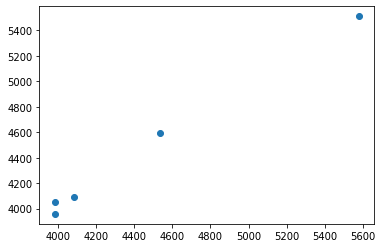

In [ ]:
#Comparación dsitribución entre años 2017-2018, OCUPADOS
fig, ax= plt.subplots()
ax.scatter(regiones_oc["2017-I"], regiones_oc["2018-I"])
plt.show()

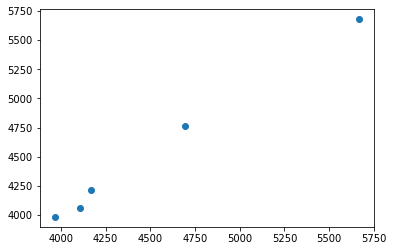

In [ ]:
fig, ax= plt.subplots()
ax.scatter(regiones_oc["2017-II"], regiones_oc["2018-II"])
plt.show()

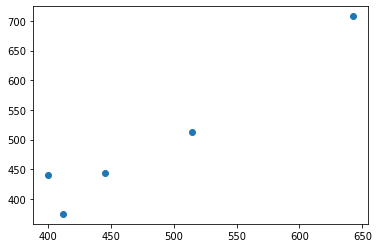

In [ ]:
#Comparación distribución entre datos 2017-2018, despempleados  
fig, ax= plt.subplots()
ax.scatter(regiones_dc["2017-I"], regiones_dc["2018-I"])
plt.show()

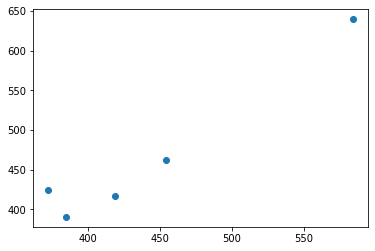

In [ ]:
fig, ax= plt.subplots()
ax.scatter(regiones_dc["2017-II"], regiones_dc["2018-II"])
plt.show()

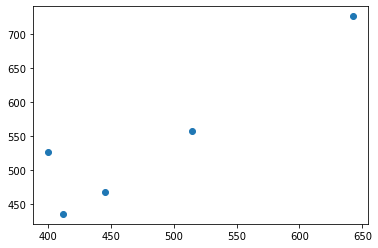

In [ ]:
#Comparación distribución entre datos 2017-2019, despempleados  
fig, ax= plt.subplots()
ax.scatter(regiones_dc["2017-I"], regiones_dc["2019-I"])
plt.show()

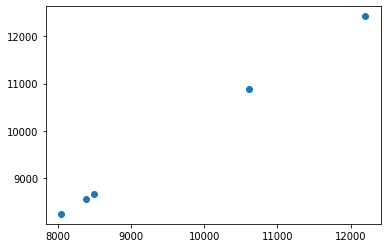

In [ ]:
fig, ax= plt.subplots()
ax.scatter(Regiones_PT["2017-I"], Regiones_PT["2019-I"])
plt.show()

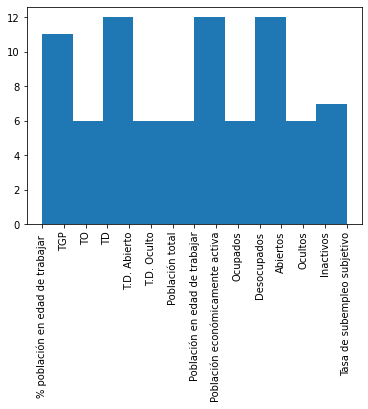

In [ ]:
fig, ax = plt.subplots()

ax.hist(Empleo_regiones["Concepto"])

plt.xticks(rotation = 90)
plt.show()

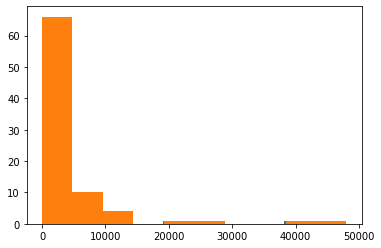

In [ ]:
fig, ax = plt.subplots()

ax.hist(Empleo_regiones[ "2017-I"])
ax.hist(Empleo_regiones["2017-II"])

plt.show()

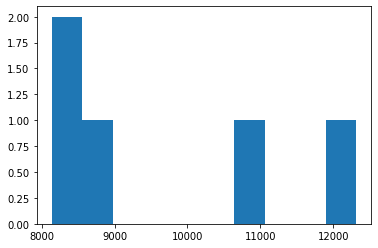

In [ ]:
fig, ax = plt.subplots()

ax.hist(Regiones_PT[ "2018-I"])


plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


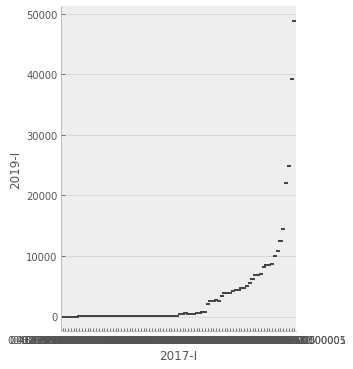

In [ ]:
sns.catplot("2017-I","2019-I", data = Empleo_regiones, kind ="box")


plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


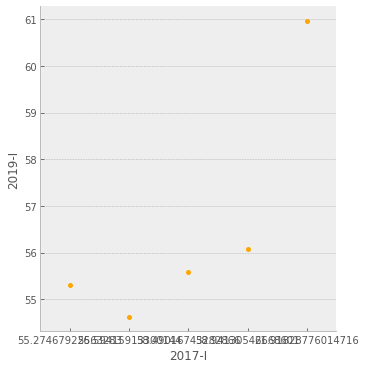

In [ ]:
sns.catplot("2017-I","2019-I", data = regiones_to, kind ="swarm", color = "orange")

plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


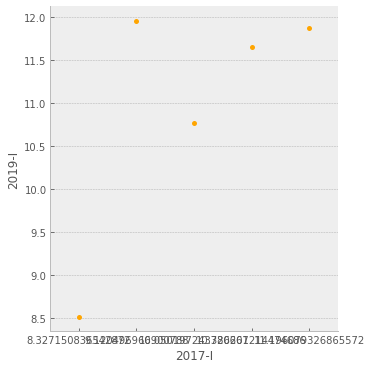

In [ ]:
sns.catplot("2017-I","2019-I", data = regiones_td, kind ="swarm", color = "orange")

plt.show()